<a href="https://colab.research.google.com/github/Sarthak777999/Tourism-Demand-Forecasting/blob/main/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
from prophet import Prophet
import numpy as np


In [ ]:
df = pd.read_csv("/content/Japan tourist data final (1).csv")
df.index.freq='MS'

In [ ]:

df.head()

,Date,Visitors
0,1/1/1990,246690
1,2/1/1990,211618
2,3/1/1990,260054
3,4/1/1990,288976
4,5/1/1990,281982


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      348 non-null    object
 1   Visitors  348 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.6+ KB


In [ ]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1/1/1990,246690
1,2/1/1990,211618
2,3/1/1990,260054
3,4/1/1990,288976
4,5/1/1990,281982


In [ ]:
df['ds'] = pd.to_datetime(df['ds'])

In [ ]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'p

In [ ]:
model=Prophet()

In [ ]:
df.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.head()

,ds,y
0,1990-01-01,246690
1,1990-02-01,211618
2,1990-03-01,260054
3,1990-04-01,288976
4,1990-05-01,281982


In [ ]:
df.tail()

,ds,y
343,2018-08-01,2577981
344,2018-09-01,2159542
345,2018-10-01,2640552
346,2018-11-01,2450696
347,2018-12-01,2631776


In [ ]:
import pandas as pd

print(pd.Timestamp.min)

print(pd.Timestamp.max)

1677-09-21 00:12:43.145224193
2262-04-11 23:47:16.854775807


In [ ]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphz8e6p_w/c7ri297v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphz8e6p_w/pr3x0ib0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80140', 'data', 'file=/tmp/tmphz8e6p_w/c7ri297v.json', 'init=/tmp/tmphz8e6p_w/pr3x0ib0.json', 'output', 'file=/tmp/tmphz8e6p_w/prophet_model4bakt3vo/prophet_model-20230722195118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:51:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:51:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
df.tail()

,ds,y
343,2018-08-01,2577981
344,2018-09-01,2159542
345,2018-10-01,2640552
346,2018-11-01,2450696
347,2018-12-01,2631776


In [ ]:

future_dates=model.make_future_dataframe(periods=365)

In [ ]:
future_dates.tail()

,ds
708,2019-11-27
709,2019-11-28
710,2019-11-29
711,2019-11-30
712,2019-12-01


In [ ]:

prediction=model.predict(future_dates)

In [ ]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
708,2019-11-27,3.182469e+06,2.956080e+06,3.164614e+06,3.173560e+06,3.193548e+06,-126281.969991,-126281.969991,-126281.969991,-126281.969991,-126281.969991,-126281.969991,0.0,0.0,0.0,3.056187e+06
709,2019-11-28,3.183439e+06,2.959392e+06,3.166101e+06,3.174492e+06,3.194643e+06,-117096.629441,-117096.629441,-117096.629441,-117096.629441,-117096.629441,-117096.629441,0.0,0.0,0.0,3.066342e+06
710,2019-11-29,3.184408e+06,2.974156e+06,3.182072e+06,3.175424e+06,3.195701e+06,-105269.330370,-105269.330370,-105269.330370,-105269.330370,-105269.330370,-105269.330370,0.0,0.0,0.0,3.079139e+06
711,2019-11-30,3.185377e+06,2.989191e+06,3.207127e+06,3.176352e+06,3.196769e+06,-90962.818153,-90962.818153,-90962.818153,-90962.818153,-90962.818153,-90962.818153,0.0,0.0,0.0,3.094415e+06
712,2019-12-01,3.186347e+06,3.008856e+06,3.214860e+06,3.177249e+06,3.197805e+06,-74422.995446,-74422.995446,-74422.995446,-74422.995446,-74422.995446,-74422.995446,0.0,0.0,0.0,3.111924e+06


Text(0.5, 1.0, 'Forecasting with Prophet')

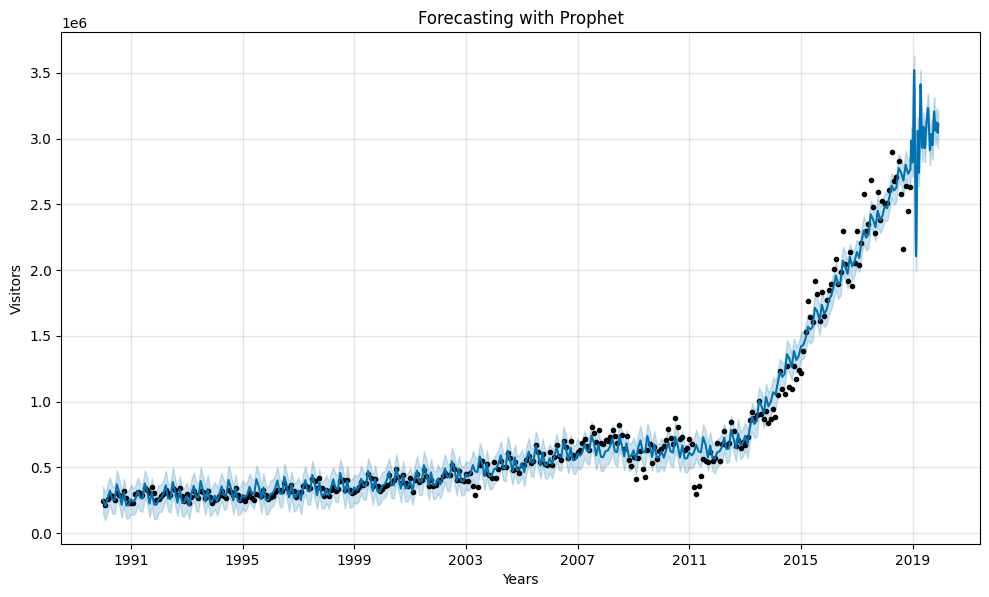

In [ ]:

import matplotlib.pyplot as plt
model.plot(prediction)
plt.xlabel("Years")
plt.ylabel("Visitors")
plt.title("Forecasting with Prophet")

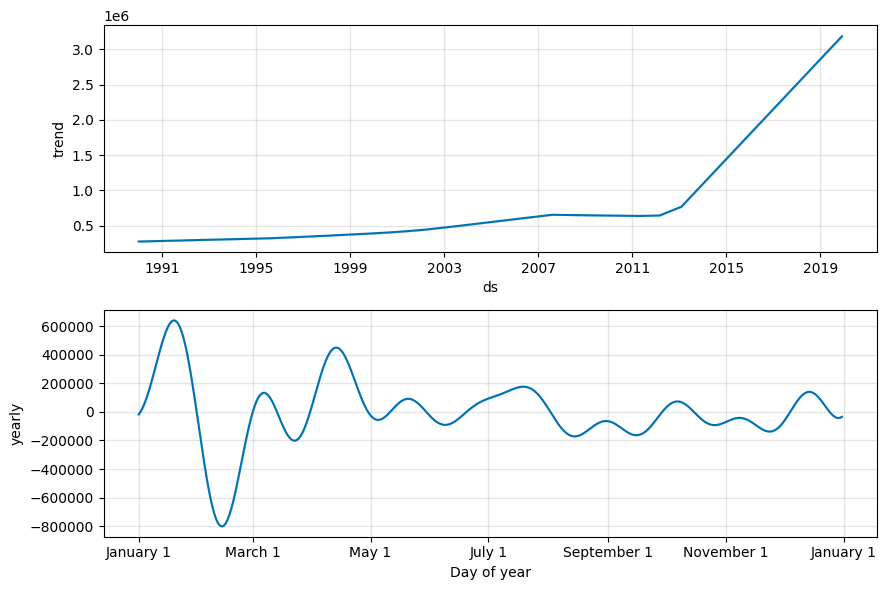

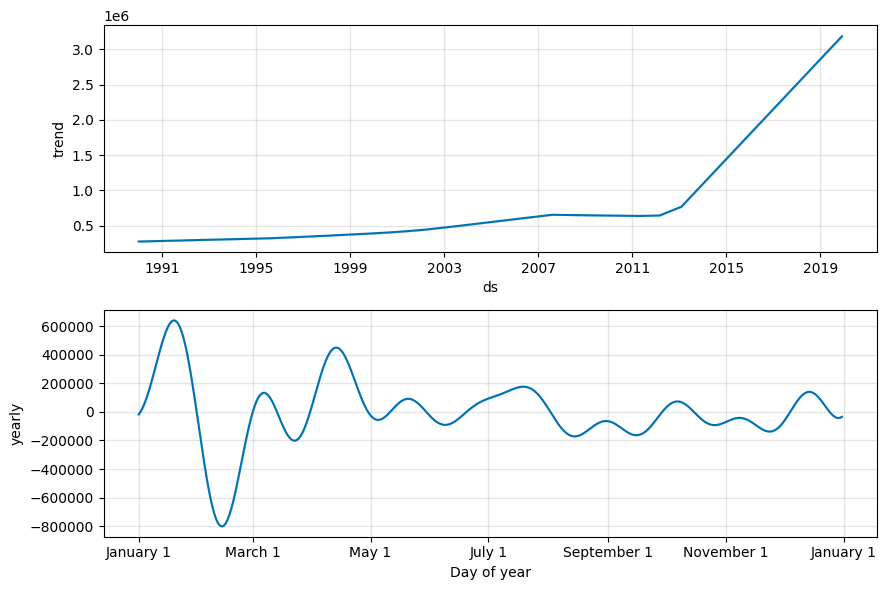

In [ ]:

model.plot_components(prediction)

In [ ]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()


INFO:prophet:Making 53 forecasts with cutoffs between 1992-04-16 00:00:00 and 2017-12-01 00:00:00


  0%|          | 0/53 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphz8e6p_w/oomsp0xy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphz8e6p_w/df424t2j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40943', 'data', 'file=/tmp/tmphz8e6p_w/oomsp0xy.json', 'init=/tmp/tmphz8e6p_w/df424t2j.json', 'output', 'file=/tmp/tmphz8e6p_w/prophet_modelldrbjgbl/prophet_model-20230722195121.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:51:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:51:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmphz8e6p_w/04scj0d3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphz8e6p_w/lijic4gh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1992-05-01,378888.630471,373935.010774,383833.616226,305547,1992-04-16
1,1992-06-01,322476.772501,317506.181673,327329.358581,287386,1992-04-16
2,1992-07-01,380083.549496,375227.949272,384915.189036,343095,1992-04-16
3,1992-08-01,333182.719842,328342.595679,337804.665935,325196,1992-04-16
4,1992-09-01,363854.916536,359192.850510,369019.738153,288282,1992-04-16


In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,2.740265e+10,165537.456383,87727.907493,0.098046,0.054682,0.099526,0.492063
1,38 days,2.723329e+10,165025.122573,86832.057560,0.097033,0.054682,0.098385,0.500000
2,40 days,2.705844e+10,164494.501373,85649.620849,0.095556,0.053747,0.096770,0.507937
3,41 days,2.739578e+10,165516.694723,87024.034019,0.096368,0.053747,0.097871,0.502646
4,42 days,2.834006e+10,168345.058221,91696.800999,0.103291,0.057318,0.104290,0.481481


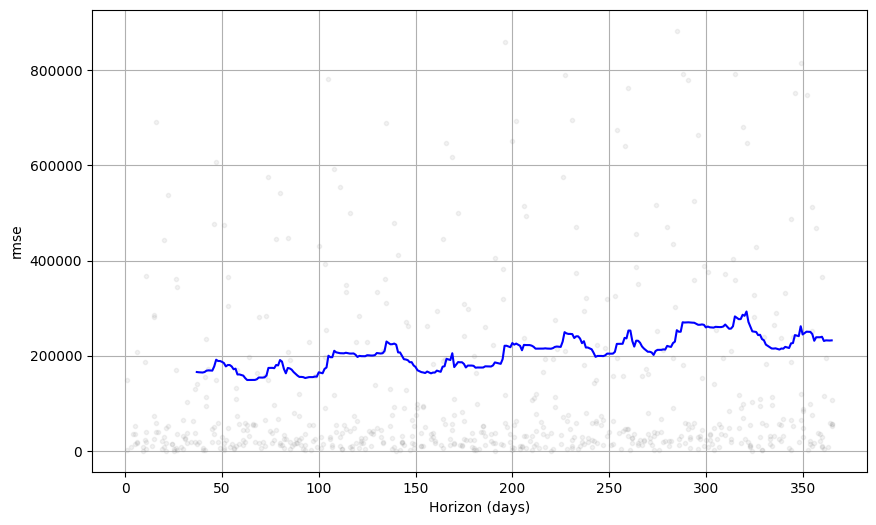

In [ ]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')